In [734]:
import seaborn as sns
import pandas as pd
from sklearn.preprocessing import OneHotEncoder
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import iqr
from sklearn.linear_model import SGDRegressor

In [735]:
sns.set(rc={'figure.figsize':(20,20)})

This lab is going to center around the idea of the iterative process of machine learning. Together we are going to work through a dataset to try to come up with a model that will predict the price of a house given features. Today we are going to focus on the doing, rather than the math. 

# Focus Points

    Working through our data and understanding it.
    
    Using EDA to see which features to select.
    
    Setting up our data in a way that makes feature selection simple.
    
    Setting up appropriate functions to make our code extensible and reusable.
    
    Commenting code in a meaningful and powerful way.
    
    Properly Scaling our data when we need to.
    
    Properly using CV to ensure that our model is good at predicting our data.
    
    Using analysis to interpret the metric generated by our CV.

# Import the Training Data Set

In [736]:
df = pd.read_csv('./data/train.csv')

# Let us note some key features about our data set. We see that it is 1460 rows, and 81 columns.

In [737]:
# This is not a large data set. We have limited samples to work with. We want to ensure that we can maximize this data. 

# What is step 1?

    We need to understand our dataset. We can see that we have 81 columns. Let's work towards building an understanding of those columns. In the folder, we will find a document that gives us info about the dataset.
    
    Let's start by writing down some notes. Which columns start to strike us as being particularly relevant in determining price? There is no wrong answer here, but we will need thought and justification. We cannot simply blindly choose what comes in and what comes out we need some justification here.

In [738]:
# Neighborhood, Lot Area, Utilities (Needs to be rebuilt), Overall Quality, Overall Condition (Check these for Colinearity), Garage (Needs to be rebuilt),Year sold(Hard Sell),

We have selected our starting features. Now, let's start the EDA process.

# Let's see how many unique neighborhoods are represented.

In [739]:
len(df['Neighborhood'].value_counts())

25

# This is quite a bit. This column is also not useable currently for regression. Why is that?

Correct, we need to switch from categorical values to numerical values. How can we do this?

We can use a process called one hot encoding. The goal of one hot encoding is to create binary representations across a categorical value. We'll see the process first, and then try to understand what is happening.

In [740]:
#Setting our Series into a Numpy Array
column_as_array = np.array(df['Neighborhood'])

In [741]:
#Reshaping our Series for use in SK Learn
column_as_array = column_as_array.reshape(-1,1)

In [742]:
#Initialize our OneHotEncoder Object
#The handle unknown says that if we transform data later, and it sees data not in the fit set, it's going to ignore that data.
#I.E. It's going to assign it a 0 across all values in the array.
enc = OneHotEncoder(handle_unknown='ignore',sparse=False)


#Create an encoder using a Numpy array as reference.
enc.fit(column_as_array)

OneHotEncoder(handle_unknown='ignore', sparse=False)

In [743]:
#The possible "bins" that objects can contain.
enc.categories_

[array(['Blmngtn', 'Blueste', 'BrDale', 'BrkSide', 'ClearCr', 'CollgCr',
        'Crawfor', 'Edwards', 'Gilbert', 'IDOTRR', 'MeadowV', 'Mitchel',
        'NAmes', 'NPkVill', 'NWAmes', 'NoRidge', 'NridgHt', 'OldTown',
        'SWISU', 'Sawyer', 'SawyerW', 'Somerst', 'StoneBr', 'Timber',
        'Veenker'], dtype=object)]

In [744]:
#Insert the values and transform them.
one_hot_encoded_neighborhoods = enc.transform(column_as_array)

In [745]:
one_hot_encoded_neighborhoods[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0.])

In [746]:
#Great! Now let's rebuild our DataFrame from this OneHotEncoder object.
#How can we do this?

In [747]:
neighborhoods_one_hot = pd.DataFrame(data=one_hot_encoded_neighborhoods,columns=enc.categories_[0])

In [748]:
neighborhoods_one_hot

,Blmngtn,Blueste,BrDale,BrkSide,ClearCr,CollgCr,Crawfor,Edwards,Gilbert,IDOTRR,...,NoRidge,NridgHt,OldTown,SWISU,Sawyer,SawyerW,Somerst,StoneBr,Timber,Veenker
0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1456,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1457,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1458,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# Great! We've successfully one hot encoded our Neighborhood value. Does this increase complexity in terms of our model?

    The answer is yes. Now we have to determine the coefficients for each of these values. The information gained though is easily worth the added complexity however. We can try to build out a statistical model that is able to see how neighborhood contributes to the price, if it does.

# Let's run a quick correlation matrix to see if we're off base or not.

    Before we do that however, we have to append the price column to our one-hot encoded database. Let's start.

# Logic Check. What exactly are we trying to do?

    We are trying to append the VALUES of the Price column as a NEW COLUMN to the existing dataframe. Using this very specific language, what are the two pieces of information we are going to need?

In [749]:
df['SalePrice']

0       208500
1       181500
2       223500
3       140000
4       250000
         ...  
1455    175000
1456    210000
1457    266500
1458    142125
1459    147500
Name: SalePrice, Length: 1460, dtype: int64

In [750]:
neighborhoods_one_hot['SalePrice'] = df['SalePrice']

In [751]:
neighborhoods_one_hot

,Blmngtn,Blueste,BrDale,BrkSide,ClearCr,CollgCr,Crawfor,Edwards,Gilbert,IDOTRR,...,NridgHt,OldTown,SWISU,Sawyer,SawyerW,Somerst,StoneBr,Timber,Veenker,SalePrice
0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,208500
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,181500
2,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,223500
3,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,140000
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,175000
1456,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,210000
1457,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,266500
1458,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,142125


In [752]:
#Great, now let's run a correlation matrix

In [753]:
neighborhoods_one_hot.corr()['SalePrice']

Blmngtn      0.019066
Blueste     -0.020250
BrDale      -0.101303
BrkSide     -0.143648
ClearCr      0.055718
CollgCr      0.072626
Crawfor      0.071160
Edwards     -0.179949
Gilbert      0.035940
IDOTRR      -0.164056
MeadowV     -0.112544
Mitchel     -0.057845
NAmes       -0.188513
NPkVill     -0.037910
NWAmes       0.023483
NoRidge      0.330424
NridgHt      0.402149
OldTown     -0.192189
SWISU       -0.063705
Sawyer      -0.128394
SawyerW      0.014560
Somerst      0.140058
StoneBr      0.215363
Timber       0.126236
Veenker      0.063471
SalePrice    1.000000
Name: SalePrice, dtype: float64

<AxesSubplot:>

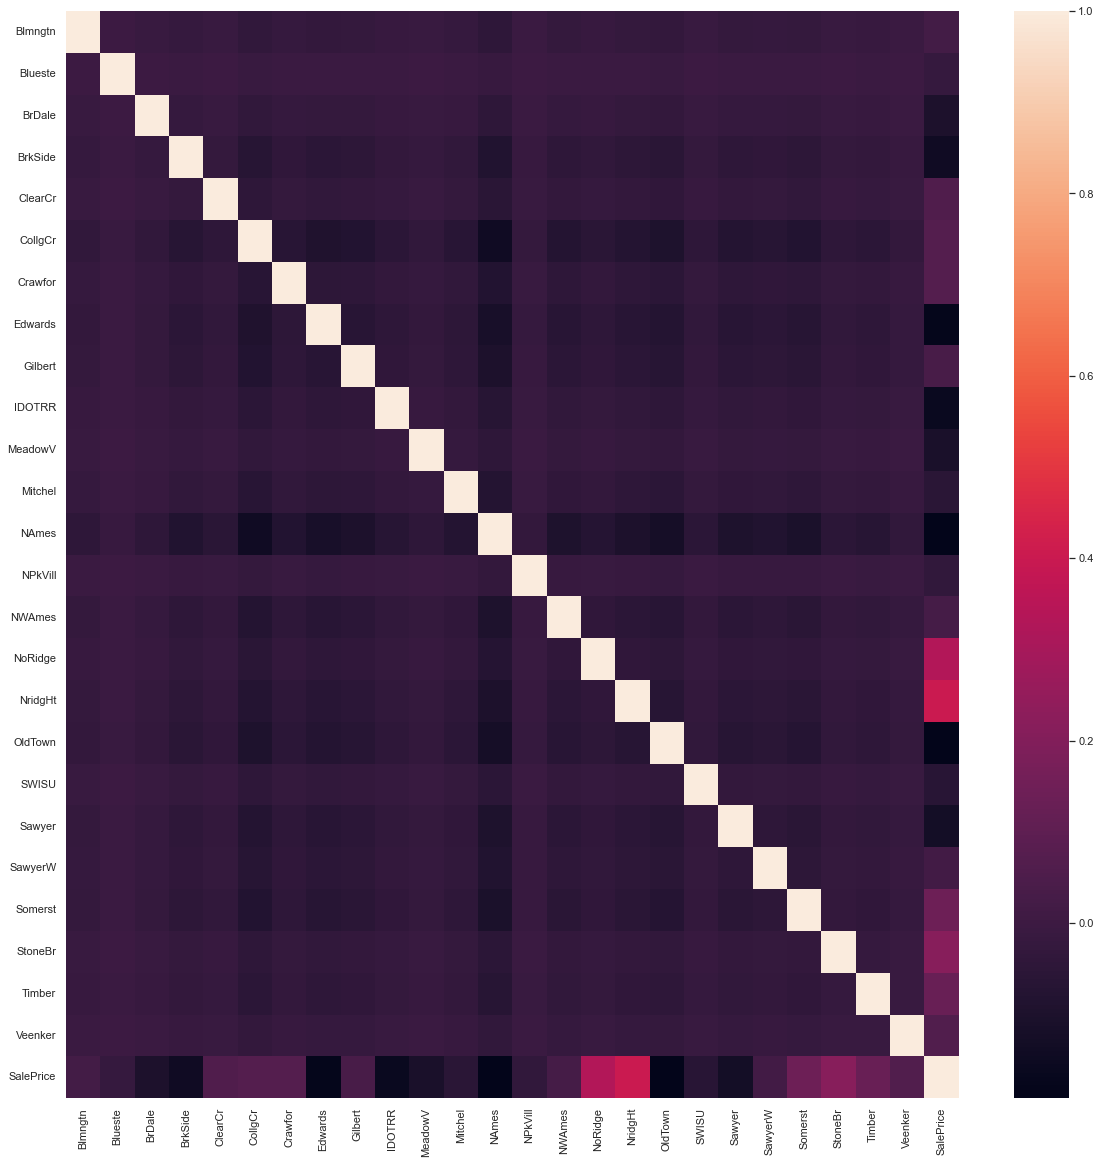

In [754]:
sns.heatmap(neighborhoods_one_hot.corr())

Let's examine what this SPECIFIC matrix is saying. This one is a bit more nuanced. 
It's saying that for the most part, independent of OTHER FACTORS there seems to not be a particularly strong correlation between neighborhoods and the sale price. There is a subset of outliers however. We can clearly see that 2 neighborhoods have a higher than average positive correlation. Similarly we have a few houses that have a negative correlation with sale price.

# Let's practice Multivariate Regression. In this case, we won't need to feature scale, as all of our features are in the same range.

In [755]:
#Let's start out with using OLS Regression.

from sklearn import linear_model

reg = linear_model.LinearRegression()
reg.fit(neighborhoods_one_hot.drop(labels='SalePrice',axis=1).values,neighborhoods_one_hot['SalePrice'])

LinearRegression()

In [756]:
reg.score(neighborhoods_one_hot.drop(columns=['SalePrice'],axis=1).values,neighborhoods_one_hot['SalePrice'])

0.5454853236590955

In [757]:
enc.categories_[0].tolist()

['Blmngtn',
 'Blueste',
 'BrDale',
 'BrkSide',
 'ClearCr',
 'CollgCr',
 'Crawfor',
 'Edwards',
 'Gilbert',
 'IDOTRR',
 'MeadowV',
 'Mitchel',
 'NAmes',
 'NPkVill',
 'NWAmes',
 'NoRidge',
 'NridgHt',
 'OldTown',
 'SWISU',
 'Sawyer',
 'SawyerW',
 'Somerst',
 'StoneBr',
 'Timber',
 'Veenker']

In [758]:
def create_neighborhood_dummy(neighborhood_name):
    list_of_neighborhoods = enc.categories_[0].tolist()
    
    index_of_neighborhood = list_of_neighborhoods.index(neighborhood_name)
    
    array_to_return = []
    for i in range(0,25):
        if i==index_of_neighborhood:
            array_to_return.append(1)
        else:
            array_to_return.append(0)
    return np.array(array_to_return).reshape(1,-1)

In [759]:
create_neighborhood_dummy('BrDale')

array([[0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0]])

In [760]:
reg.predict(create_neighborhood_dummy('NoRidge'))

array([336640.])

# Great! We've made our first model, and we can start to see some promising results. Now, we could only use this feature as the predictor, but we can see we are leaving so much on the table. Let's fine tune our model just a bit more.

    Next, let's work on adding in lot area into our model.

In [761]:
df.corr()['SalePrice']['LotArea']

0.2638433538714051

In [762]:
neighborhoods_one_hot

,Blmngtn,Blueste,BrDale,BrkSide,ClearCr,CollgCr,Crawfor,Edwards,Gilbert,IDOTRR,...,NridgHt,OldTown,SWISU,Sawyer,SawyerW,Somerst,StoneBr,Timber,Veenker,SalePrice
0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,208500
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,181500
2,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,223500
3,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,140000
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,175000
1456,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,210000
1457,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,266500
1458,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,142125


In [763]:
#We can see a weak correlation here. This is okay. Do we need to test for colinearity here? It doesn't hurt but the results
#Might be hard to interpret.

In [764]:
neighborhoods_one_hot_with_lot_area = neighborhoods_one_hot.copy()

In [765]:
neighborhoods_one_hot_with_lot_area['LotArea'] = df['LotArea']

In [766]:
neighborhoods_one_hot_with_lot_area.corr()['LotArea']

Blmngtn     -0.077438
Blueste     -0.033006
BrDale      -0.091949
BrkSide     -0.064342
ClearCr      0.285316
CollgCr     -0.030444
Crawfor      0.024652
Edwards     -0.008103
Gilbert      0.020670
IDOTRR      -0.038910
MeadowV     -0.089123
Mitchel      0.020684
NAmes       -0.016124
NPkVill     -0.057221
NWAmes       0.030277
NoRidge      0.063068
NridgHt      0.008776
OldTown     -0.067048
SWISU       -0.031606
Sawyer      -0.001333
SawyerW     -0.012197
Somerst     -0.067096
StoneBr      0.002052
Timber       0.215400
Veenker      0.044440
SalePrice    0.263843
LotArea      1.000000
Name: LotArea, dtype: float64

<AxesSubplot:>

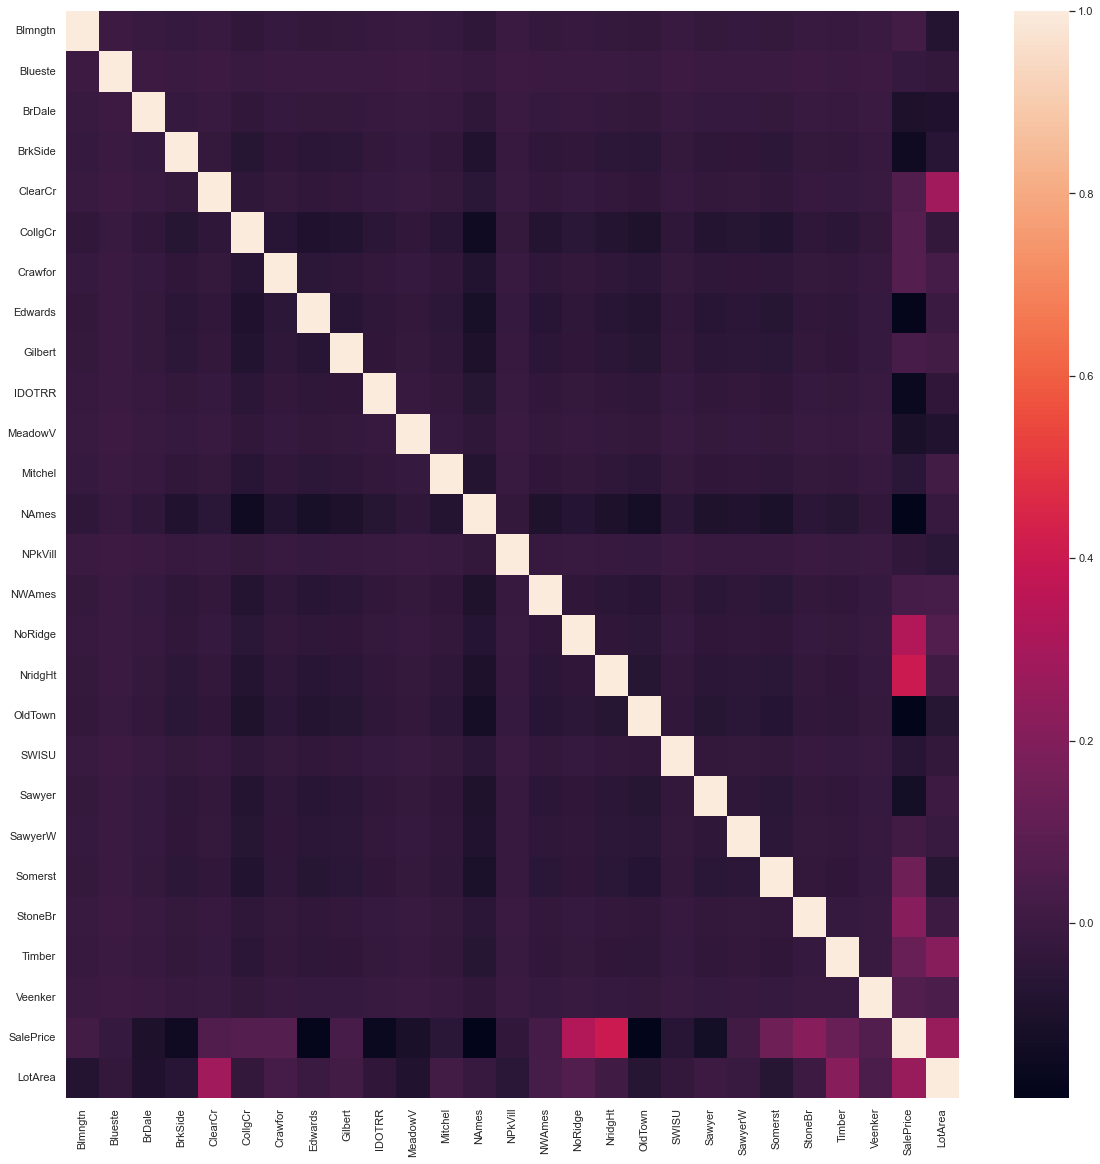

In [767]:
sns.heatmap(neighborhoods_one_hot_with_lot_area.corr())

In [768]:
#Luckily for us, there doesn't seem to be a correlation between these two values.

# Let's Check the Distribution

<AxesSubplot:xlabel='LotArea', ylabel='Count'>

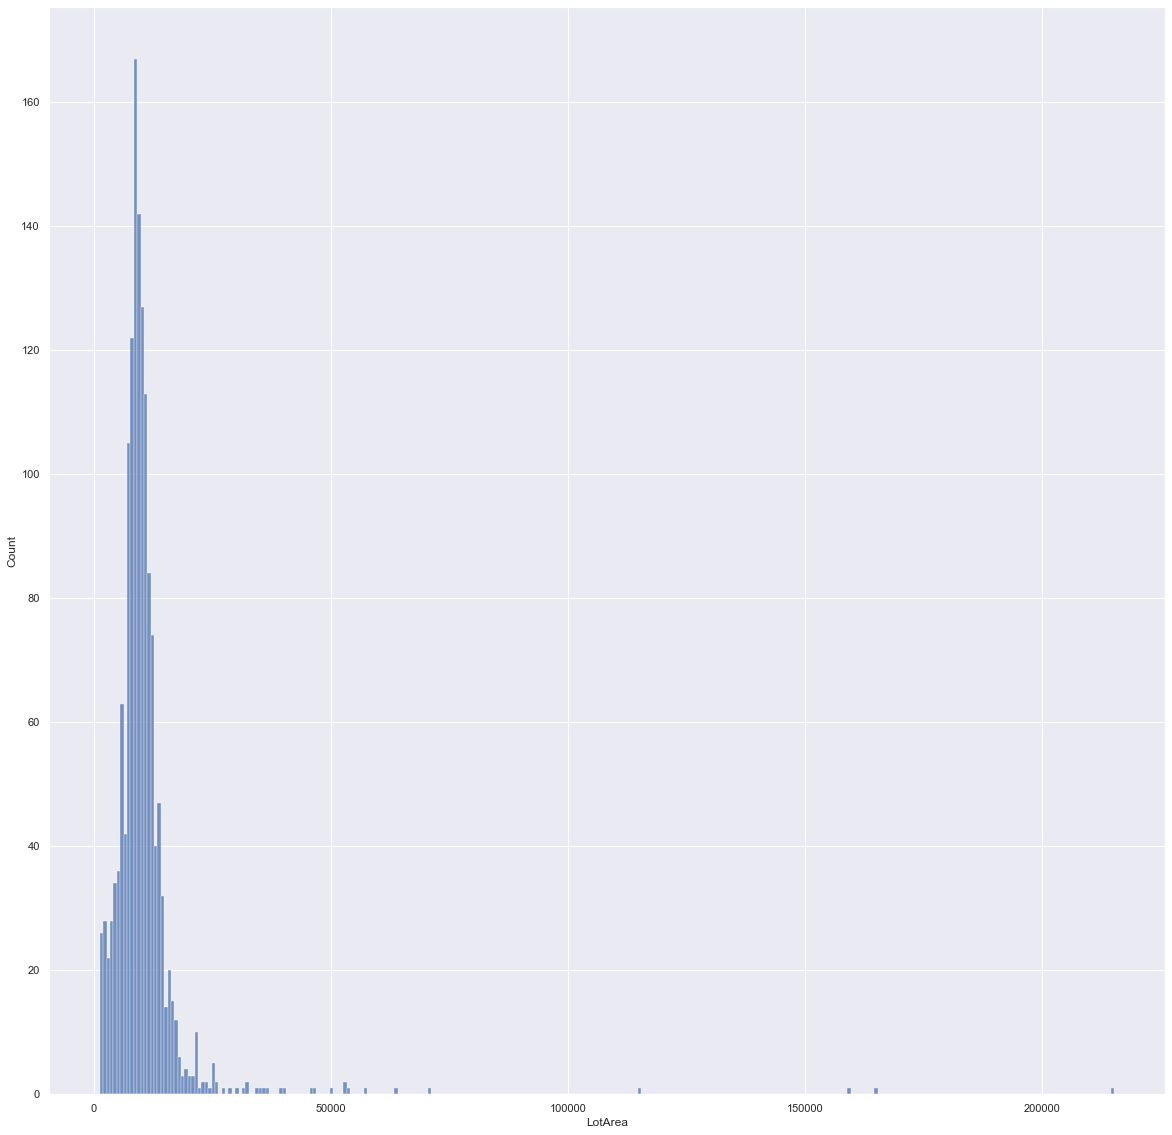

In [769]:
sns.histplot(data=neighborhoods_one_hot_with_lot_area['LotArea'])

We have an approximately normal distribution, with severe right skew. Now we come to our first impasse. What do we do with these outliers? Should we cut them, or should we include them make our model better handle variance?

Let's try it with both.

# Our Skew is a bit too high to be able to call this a guassian (normal) distribution. What should we use then to measure outliers? Correct, we should be using the Median.

# Let's formally define an outlier. If we remember from previous math lessons, It's said to be a value above of Q3 + (1.5 * IQR), or below Q1 - (1.5 * IQR) 

<AxesSubplot:>

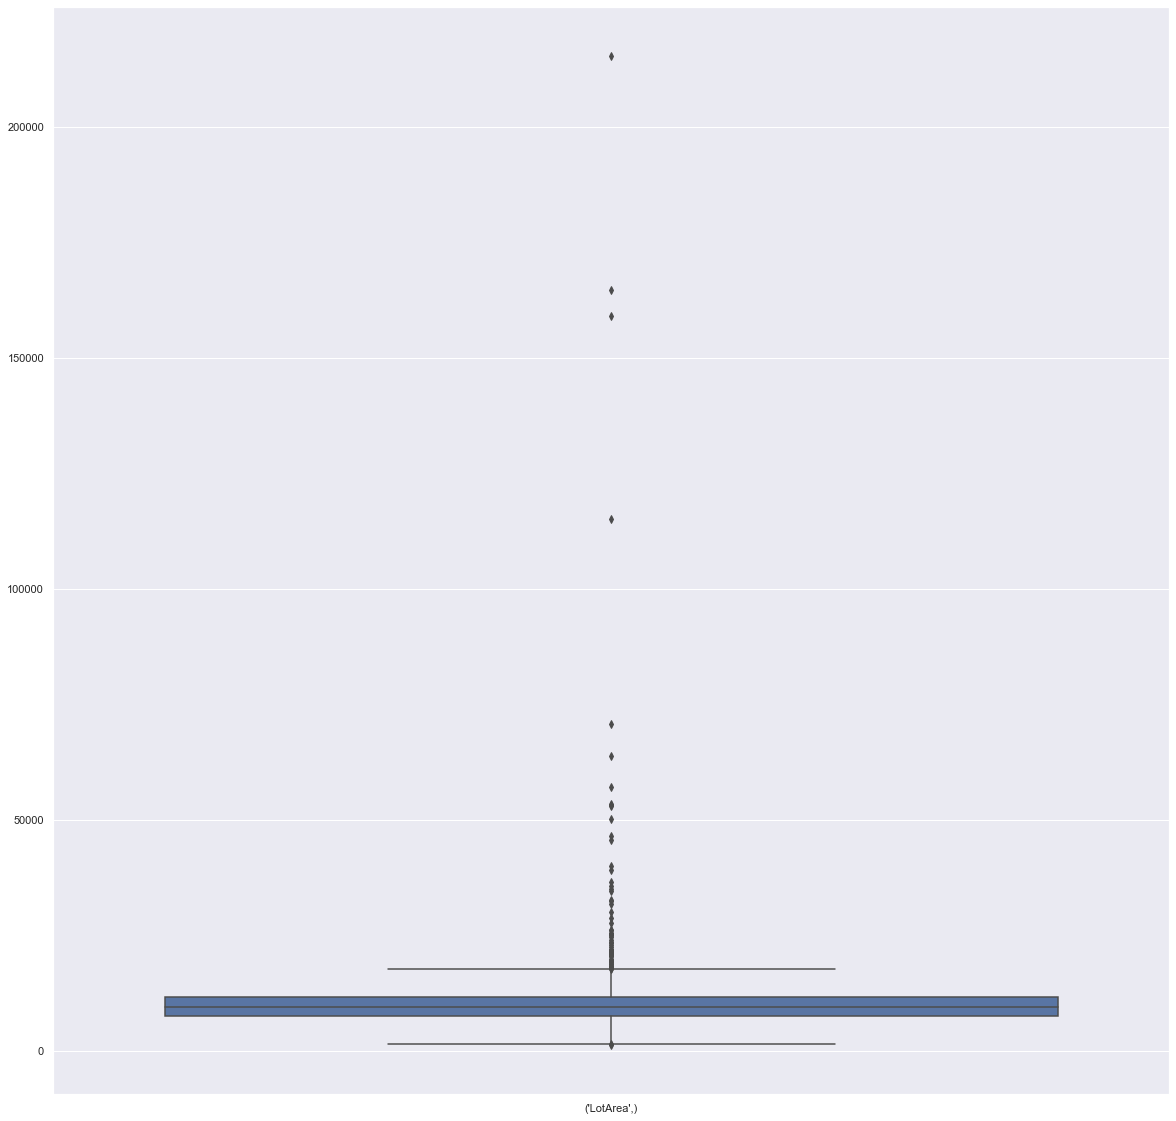

In [770]:
sns.boxplot(data=neighorhoods_one_hot_with_lot_area['LotArea'])

In [771]:
# We can see we have quite a few outliers. Let's trim them out. 
# Let's create the function ourselves to create the IQR to practice our Python.

In [775]:
Q1 = neighborhoods_one_hot_with_lot_area['LotArea'].quantile(.25,interpolation='midpoint')
Q3 = neighborhoods_one_hot_with_lot_area['LotArea'].quantile(.75,interpolation='midpoint')
IQR = Q3-Q1

In [776]:
upperlimit = Q3+(1.5*IQR)
lowerlimit = Q1-(1.5*IQR)

In [777]:
filtered_df = neighborhoods_one_hot_with_lot_area.loc[(neighborhoods_one_hot_with_lot_area['LotArea']>lowerlimit) & (neighborhoods_one_hot_with_lot_area['LotArea']<upperlimit)]

In [778]:
filtered_df

,Blmngtn,Blueste,BrDale,BrkSide,ClearCr,CollgCr,Crawfor,Edwards,Gilbert,IDOTRR,...,OldTown,SWISU,Sawyer,SawyerW,Somerst,StoneBr,Timber,Veenker,SalePrice,LotArea
0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,208500,8450
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,181500,9600
2,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,223500,11250
3,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,140000,9550
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,250000,14260
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,175000,7917
1456,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,210000,13175
1457,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,266500,9042
1458,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,142125,9717


<AxesSubplot:xlabel='LotArea', ylabel='Count'>

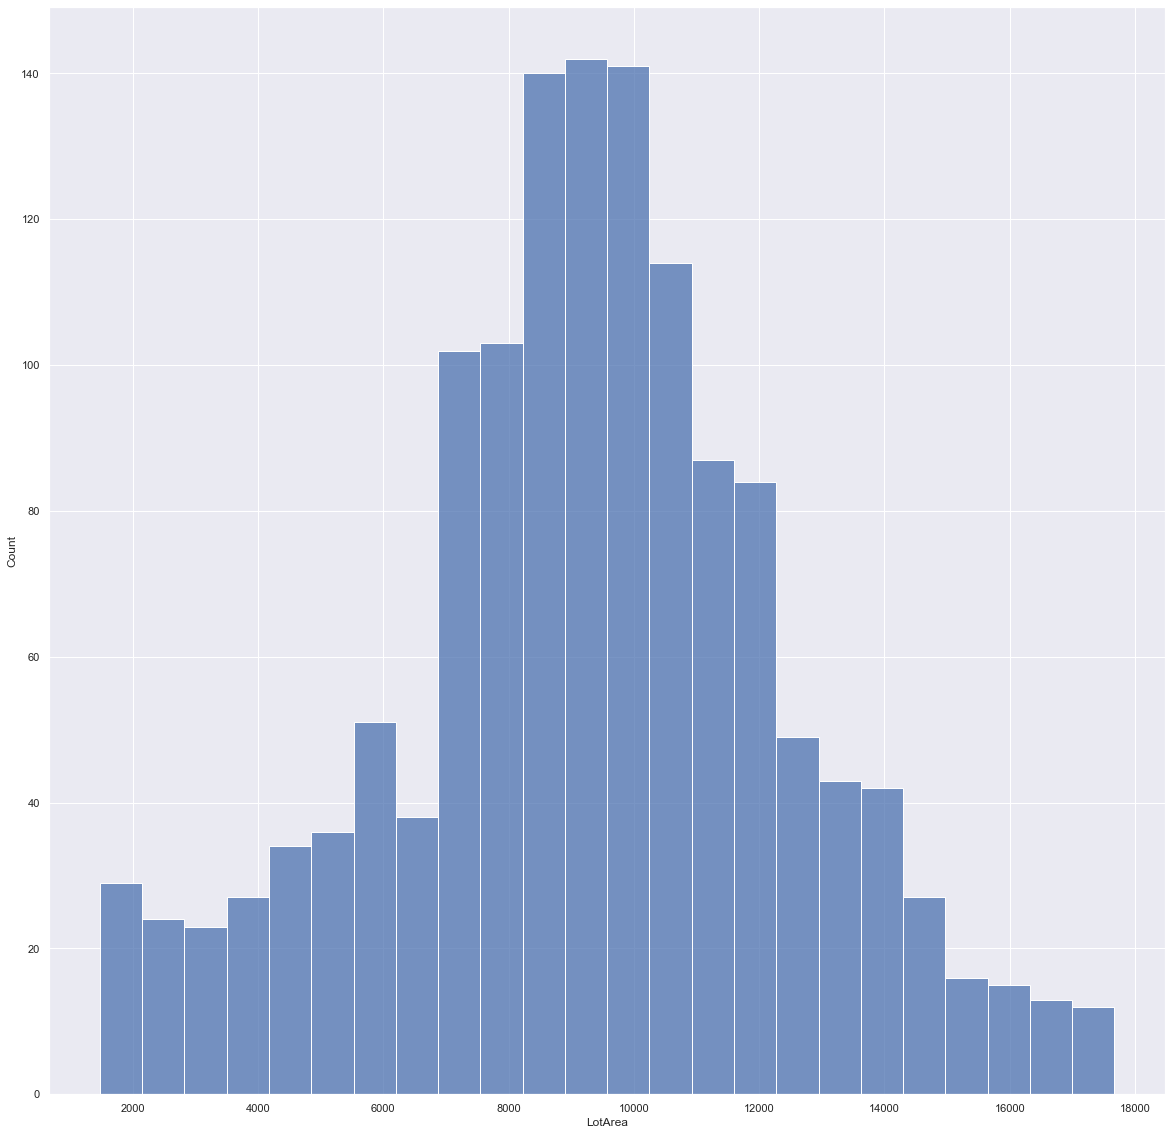

In [779]:
sns.histplot(data=filtered_df['LotArea'])

# Let's build a model that does not take into account lotArea outliers.

In [780]:
reg = linear_model.LinearRegression()
reg.fit(filtered_df.drop(labels='SalePrice',axis=1).values,filtered_df['SalePrice'])
reg.score(filtered_df.drop(labels='SalePrice',axis=1).values,filtered_df['SalePrice'])

0.6473809617413522

In [781]:
reg = linear_model.LinearRegression()
reg.fit(filtered_df.drop(labels='SalePrice',axis=1).values,filtered_df['SalePrice'])
reg.score(neighborhoods_one_hot_with_lot_area.drop(labels='SalePrice',axis=1).values,neighborhoods_one_hot_with_lot_area['SalePrice'])

-0.10396463290704006

# We can see that our regression fails specatacularly at predicting outside of the range, but extremely well inside the range.

# Let's try a filter that only removes a few outliers.

In [782]:
cut_only_a_few = neighborhoods_one_hot_with_lot_area.loc[neighborhoods_one_hot_with_lot_area['LotArea']<100000]
reg = linear_model.LinearRegression()
reg.fit(cut_only_a_few.drop(labels='SalePrice',axis=1).values,cut_only_a_few['SalePrice'])
reg.score(cut_only_a_few.drop(labels='SalePrice',axis=1).values,cut_only_a_few['SalePrice'])

0.600723503868775

# Let's build a model that strictly includes outliers without modification.

In [783]:
reg = linear_model.LinearRegression()
reg.fit(neighborhoods_one_hot_with_lot_area.drop(labels='SalePrice',axis=1).values,neighborhoods_one_hot_with_lot_area['SalePrice'])
reg.score(neighborhoods_one_hot_with_lot_area.drop(labels='SalePrice',axis=1).values,neighborhoods_one_hot_with_lot_area['SalePrice'])

0.5730455761088944

# Let's build a model that uses SGD. This will allow us to use Huber loss to try to minimize the effect of outliers. Let's scale our data for Regression.

In [784]:
reg = SGDRegressor()
reg.fit(filtered_df.drop(labels='SalePrice',axis=1).values,filtered_df['SalePrice'])
reg.score(neighborhoods_one_hot_with_lot_area.drop(labels='SalePrice',axis=1).values,neighborhoods_one_hot_with_lot_area['SalePrice'])

-4.120762709725659e+21

# Let's build a log transformed model.

In [785]:
np.log(neighborhoods_one_hot_with_lot_area['LotArea'].values)

array([9.04192172, 9.16951838, 9.32812341, ..., 9.10963567, 9.18163221,
       9.20402044])

<AxesSubplot:ylabel='Density'>

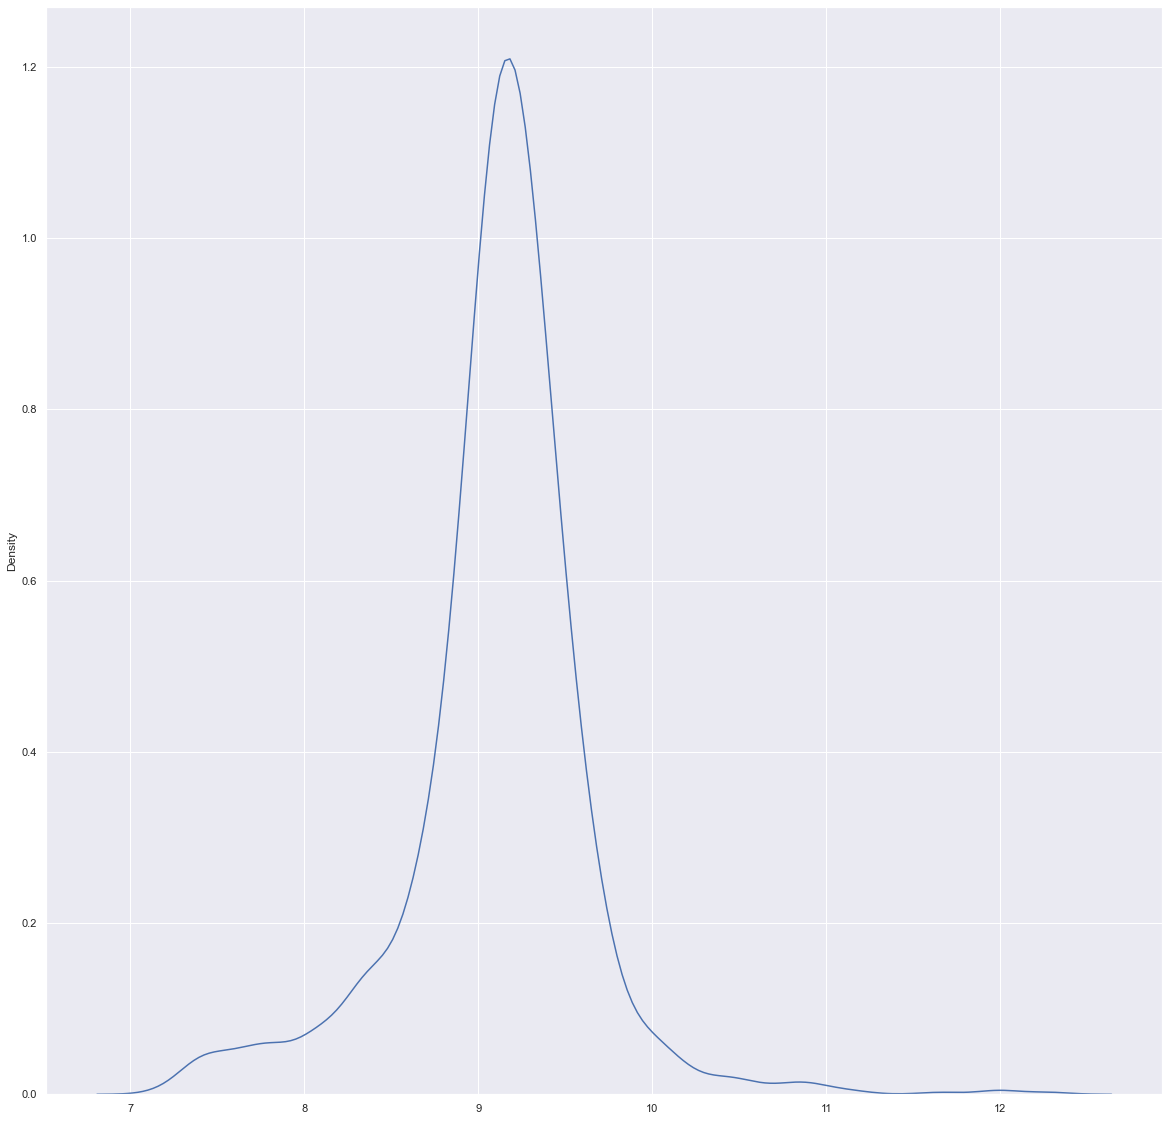

In [786]:
sns.kdeplot(np.log(neighborhoods_one_hot_with_lot_area['LotArea'].values))

In [787]:
replacement_values = np.log(neighborhoods_one_hot_with_lot_area['LotArea'].values)
neighborhoods_one_hot_with_lot_area['LotArea'].drop(columns=['LotArea'],inplace=True)


In [788]:
neighborhoods_one_hot_with_lot_area['LotArea']=replacement_values

In [789]:
neighborhoods_one_hot_with_lot_area

,Blmngtn,Blueste,BrDale,BrkSide,ClearCr,CollgCr,Crawfor,Edwards,Gilbert,IDOTRR,...,OldTown,SWISU,Sawyer,SawyerW,Somerst,StoneBr,Timber,Veenker,SalePrice,LotArea
0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,208500,9.041922
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,181500,9.169518
2,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,223500,9.328123
3,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,140000,9.164296
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,250000,9.565214
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,175000,8.976768
1456,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,210000,9.486076
1457,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,266500,9.109636
1458,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,142125,9.181632


In [790]:
reg = linear_model.LinearRegression()
reg.fit(neighborhoods_one_hot_with_lot_area.drop(labels='SalePrice',axis=1).values,neighborhoods_one_hot_with_lot_area['SalePrice'])
reg.score(neighborhoods_one_hot_with_lot_area.drop(labels='SalePrice',axis=1).values,neighborhoods_one_hot_with_lot_area['SalePrice'])

0.6256212740575855

In [791]:
test_df = pd.read_csv('./data/test.csv')

In [792]:
test_df

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,2915,160,RM,21.0,1936,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2006,WD,Normal
1455,2916,160,RM,21.0,1894,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,4,2006,WD,Abnorml
1456,2917,20,RL,160.0,20000,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,9,2006,WD,Abnorml
1457,2918,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,MnPrv,Shed,700,7,2006,WD,Normal


In [793]:
column_as_array = np.array(test_df['Neighborhood'])
#Reshaping our Series for use in SK Learn
column_as_array = column_as_array.reshape(-1,1)
#Initialize our OneHotEncoder Object
#The handle unknown says that if we transform data later, and it sees data not in the fit set, it's going to ignore that data.
#I.E. It's going to assign it a 0 across all values in the array.
enc = OneHotEncoder(handle_unknown='ignore',sparse=False)

#Create an encoder using a Numpy array as reference.
enc.fit(column_as_array)

one_hot_encoded_neighborhoods_test = enc.transform(column_as_array)
neighborhoods_one_hot_test = pd.DataFrame(data=one_hot_encoded_neighborhoods_test,columns=enc.categories_[0])
neighborhoods_one_hot_with_lot_area_test = neighborhoods_one_hot_test.copy()
neighborhoods_one_hot_with_lot_area_test['LotArea'] = test_df['LotArea']
replacement_values = np.log(neighborhoods_one_hot_with_lot_area_test['LotArea'].values)
neighborhoods_one_hot_with_lot_area_test['LotArea'].drop(columns=['LotArea'],inplace=True)
neighborhoods_one_hot_with_lot_area_test['LotArea']=replacement_values

In [794]:
predictions = reg.predict(neighborhoods_one_hot_with_lot_area_test)

c:\users\axlcr\appdata\local\programs\python\python39\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


In [795]:
neighborhoods_one_hot_with_lot_area_test['SalePrice'] = predictions

In [796]:
neighborhoods_one_hot_with_lot_area_test

,Blmngtn,Blueste,BrDale,BrkSide,ClearCr,CollgCr,Crawfor,Edwards,Gilbert,IDOTRR,...,OldTown,SWISU,Sawyer,SawyerW,Somerst,StoneBr,Timber,Veenker,LotArea,SalePrice
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9.360655,156000.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9.565704,167936.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9.534595,207536.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9.208138,188512.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,8.518193,278880.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7.568379,91696.0
1455,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7.546446,90416.0
1456,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9.903488,194016.0
1457,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9.253496,156128.0


In [797]:
neighborhoods_one_hot_with_lot_area_test = neighborhoods_one_hot_with_lot_area_test.reset_index()

In [798]:
to_csv = neighborhoods_one_hot_with_lot_area_test[['index','SalePrice']].copy()

In [799]:
to_csv.rename(columns={'index':'Id'},inplace=True)

In [800]:
to_csv['Id']=[x for x in range(1461,1461+1459)]

In [801]:
to_csv.to_csv(r'C:\Users\axlcr\Desktop\export_dataframe.csv', index = False, header=True)